In [1]:
path= '/home/karen/Documents/GitHub/Muscle_wasting/mirna_scoring/results/UseCase_Base/Best_pathways_per_cluster.csv'

In [10]:
column_sets.keys()

dict_keys(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_indicators, from_memberships, from_contents

# Load CSV
df = pd.read_csv(path, dtype=str)  # Read as strings to avoid conversion issues

# Convert each column into a set of unique values
column_sets = {col: set(df[col].dropna().unique()) for col in df.columns}

# Create a DataFrame for the UpSet plot
all_items = set.union(*column_sets.values())  # Get all unique items
data = {col: [item in column_sets[col] for item in all_items] for col in column_sets}
upset_df = pd.DataFrame(data, index=list(all_items))

# Generate the UpSet plot


/home/karen/Documents/GitHub/Muscle_wasting/venv/lib/python3.11/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/karen/Documents/GitHub/Muscle_wasting/venv/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the orig

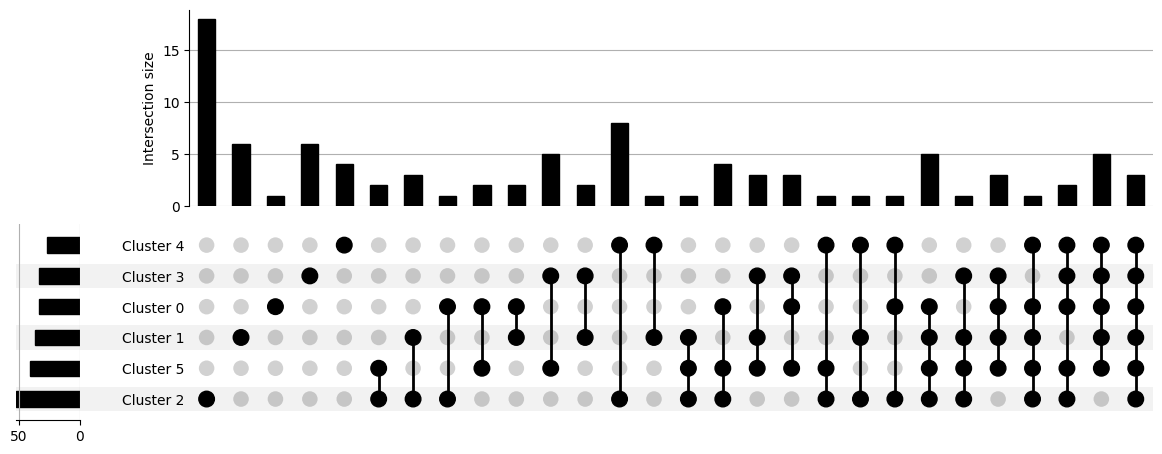

In [17]:
upset = UpSet(from_contents(column_sets))
upset.plot()
plt.show()

In [21]:
common_items = set.intersection(*column_sets.values())
common_items


{'GOBP_MUSCLE_CELL_DIFFERENTIATION',
 'GOBP_MUSCLE_STRUCTURE_DEVELOPMENT',
 'REACTOME_CYTOKINE_SIGNALING_IN_IMMUNE_SYSTEM'}

In [ ]:
unique_items = {col: column_sets[col] - set.union(*(column_sets[c] for c in column_sets if c != col)) for col in column_sets}


{'Cluster 0': {'GOBP_STRIATED_MUSCLE_ADAPTATION'},
 'Cluster 1': {'GOBP_CYTOKINE_PRODUCTION_INVOLVED_IN_IMMUNE_RESPONSE',
  'GOBP_MYOTUBE_DIFFERENTIATION',
  'GOBP_NEGATIVE_REGULATION_OF_CYTOKINE_PRODUCTION_INVOLVED_IN_IMMUNE_RESPONSE',
  'GOBP_POSITIVE_REGULATION_OF_SMOOTH_MUSCLE_CELL_MIGRATION',
  'GOBP_REGULATION_OF_SKELETAL_MUSCLE_TISSUE_DEVELOPMENT',
  'GOBP_SKELETAL_MUSCLE_TISSUE_REGENERATION'},
 'Cluster 2': {'GOBP_CYTOKINE_PRODUCTION_INVOLVED_IN_INFLAMMATORY_RESPONSE',
  'GOBP_MITOCHONDRIAL_FUSION',
  'GOBP_MITOTIC_CELL_CYCLE_CHECKPOINT_SIGNALING',
  'GOBP_MITOTIC_DNA_INTEGRITY_CHECKPOINT_SIGNALING',
  'GOBP_MITOTIC_G1_S_TRANSITION_CHECKPOINT_SIGNALING',
  'GOBP_MITOTIC_G2_DNA_DAMAGE_CHECKPOINT_SIGNALING',
  'GOBP_MUSCLE_CELL_PROLIFERATION',
  'GOBP_NEGATIVE_REGULATION_OF_SMOOTH_MUSCLE_CELL_PROLIFERATION',
  'GOBP_NEGATIVE_REGULATION_OF_VASCULAR_ASSOCIATED_SMOOTH_MUSCLE_CELL_PROLIFERATION',
  'GOBP_POSITIVE_REGULATION_OF_AUTOPHAGY',
  'GOBP_POSITIVE_REGULATION_OF_CYTOKINE_PRODU

In [33]:
unique_items['Cluster 2']

{'GOBP_CYTOKINE_PRODUCTION_INVOLVED_IN_INFLAMMATORY_RESPONSE',
 'GOBP_MITOCHONDRIAL_FUSION',
 'GOBP_MITOTIC_CELL_CYCLE_CHECKPOINT_SIGNALING',
 'GOBP_MITOTIC_DNA_INTEGRITY_CHECKPOINT_SIGNALING',
 'GOBP_MITOTIC_G1_S_TRANSITION_CHECKPOINT_SIGNALING',
 'GOBP_MITOTIC_G2_DNA_DAMAGE_CHECKPOINT_SIGNALING',
 'GOBP_MUSCLE_CELL_PROLIFERATION',
 'GOBP_NEGATIVE_REGULATION_OF_SMOOTH_MUSCLE_CELL_PROLIFERATION',
 'GOBP_NEGATIVE_REGULATION_OF_VASCULAR_ASSOCIATED_SMOOTH_MUSCLE_CELL_PROLIFERATION',
 'GOBP_POSITIVE_REGULATION_OF_AUTOPHAGY',
 'GOBP_POSITIVE_REGULATION_OF_CYTOKINE_PRODUCTION',
 'GOBP_POSITIVE_REGULATION_OF_CYTOKINE_PRODUCTION_INVOLVED_IN_INFLAMMATORY_RESPONSE',
 'GOBP_POSITIVE_REGULATION_OF_SMOOTH_MUSCLE_CELL_PROLIFERATION',
 'GOBP_POSITIVE_REGULATION_OF_TUMOR_NECROSIS_FACTOR_SUPERFAMILY_CYTOKINE_PRODUCTION',
 'GOBP_POSITIVE_REGULATION_OF_VASCULAR_ASSOCIATED_SMOOTH_MUSCLE_CELL_PROLIFERATION',
 'GOBP_REGULATION_OF_SMOOTH_MUSCLE_CELL_DIFFERENTIATION',
 'GOBP_VASCULAR_ASSOCIATED_SMOOTH_MUSCLE_

In [31]:
number_items = {col: len(column_sets[col]) for col in column_sets}
number_items

{'Cluster 0': 33,
 'Cluster 1': 37,
 'Cluster 2': 52,
 'Cluster 3': 33,
 'Cluster 4': 27,
 'Cluster 5': 41}